# Tutorial for using `align_represenatations.py` 

In [7]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '../'))

import numpy as np
import pandas as pd
import pickle as pkl
from src.align_representations import Representation, Pairwise_Analysis, Align_Representations, Optimization_Config, Visualize_Matrix
from src.utils.utils_functions import get_category_idx

## Load data
you can choose the following data
1. 'DNN': representations of 2000 imagenet images in AlexNet and VGG19
1. 'color': human similarity judgements of 93 colors for 5 paricipants groups
1. 'face': human similarity judgements of 16 faces, attended vs unattended condition in the same participant
1. 'THINGS' : human similarity judgements of 1854 objects for 4 paricipants groups



In [8]:
data_select = "THINGS"

'''
Set Representations
    - A Representation needs a name and either an embedding or a similarity matrix.
'''
# Parameters
n_representations = 4 # Set the number of representations. This number must be equal to or less than the number of groups.
metric = "euclidean"

# representations list that will be used in Align_Representations
representations = list()

# Load data and create representations instance
if data_select == 'color':
    data_path = '../data/num_groups_5_seed_0_fill_val_3.5.pickle'
    with open(data_path, "rb") as f:
        data = pkl.load(f)
    sim_mat_list = data["group_ave_mat"]
    for i in range(n_representations):
        name = f"Group{i+1}"
        sim_mat = sim_mat_list[i]
        representation = Representation(name = name, sim_mat = sim_mat)
        representations.append(representation)

elif data_select == "THINGS":
    for i in range(n_representations):
        name = f"Group{i+1}"
        embedding = np.load(f"../data/THINGS_embedding_Group{i+1}.npy")[0]
        category_mat = pd.read_csv("../data/category_mat_manual_preprocessed.csv", sep = ",", index_col = 0)  
        representation = Representation(name = name, embedding = embedding, metric = metric, category_mat = category_mat)
        representations.append(representation)

                    Number
animal                 114
bird                    25
insect                  17
plant                   28
clothing                82
clothing accessory      36
home decor              37
furniture               33
kitchen appliance        4
kitchen tool             7
container               97
food                   185
fruit                   33
vegetable               42
dessert                 36
drink                   19
electronic device       64
part of car             30
sports equipment        56
vehicle                 67
body part               34
medical equipment       24
musical instrument      33
office supply           19
tool                    93
toy                     32
weapon                  48
others                 559
                    Number
animal                 114
bird                    25
insect                  17
plant                   28
clothing                82
clothing accessory      36
home decor              37
f

## Set the parameters for the optimazation of GWOT, and the parameters for visualizing matrices

In [9]:

config = Optimization_Config(data_name = data_select, 
                             delete_study = False, 
                             device = 'cpu',
                             to_types = 'numpy',
                             n_jobs = 1,
                             init_plans_list = ['random'],
                             num_trial = 4,
                             n_iter = 1,
                             max_iter = 200,
                             sampler_name = 'tpe',
                             eps_list = [1, 10], # [1, 10] for THINGS data, [0.02, 0.2] for colors data
                             eps_log = True,
                             pruner_name = 'hyperband',
                             pruner_params = {'n_startup_trials': 1, 'n_warmup_steps': 2, 'min_resource': 2, 'reduction_factor' : 3}
                             )

visualize_matrix = Visualize_Matrix(figsize=(8,6), title_size = 15)

## Unsupervised alignment between Representations
    - The object has methods for RSA, GW-alignment, evaluation of the alignment and visalization of aligned embeddings.
    - The parameter "shuffle" means a method is applied for a shuffled similarity matrix.

Pair number 0 : Group1 vs Group2
Pair number 1 : Group1 vs Group3
Pair number 2 : Group1 vs Group4
Pair number 3 : Group2 vs Group3
Pair number 4 : Group2 vs Group4
Pair number 5 : Group3 vs Group4


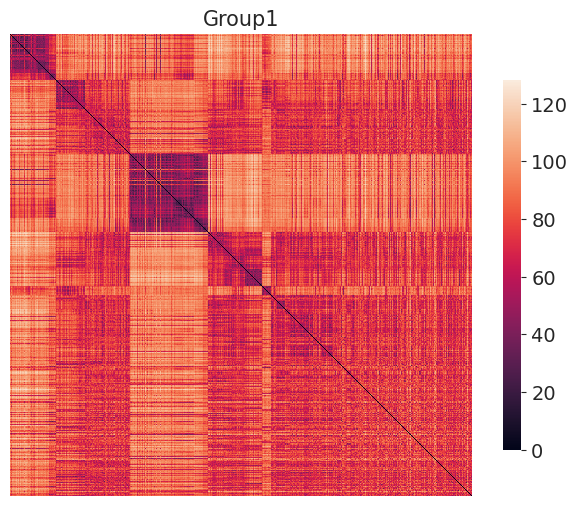

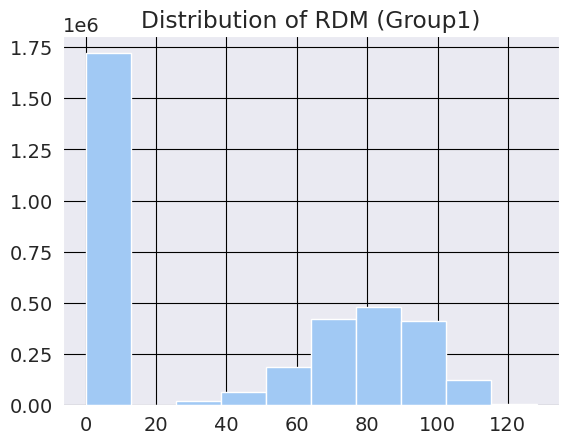

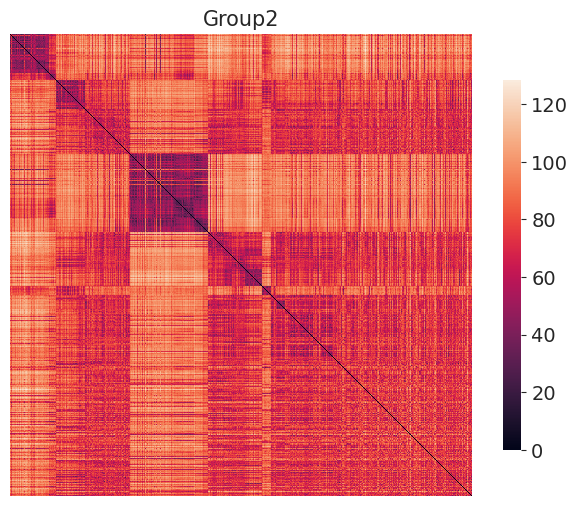

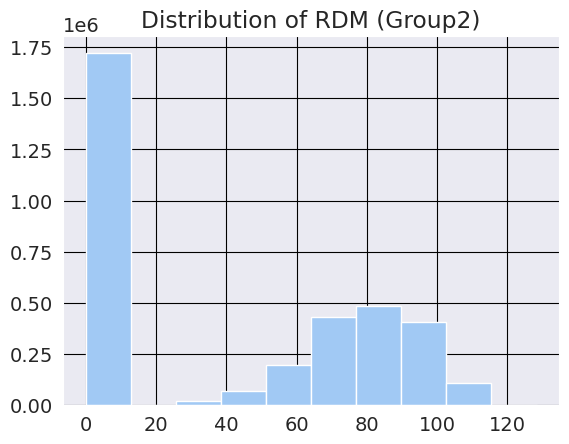

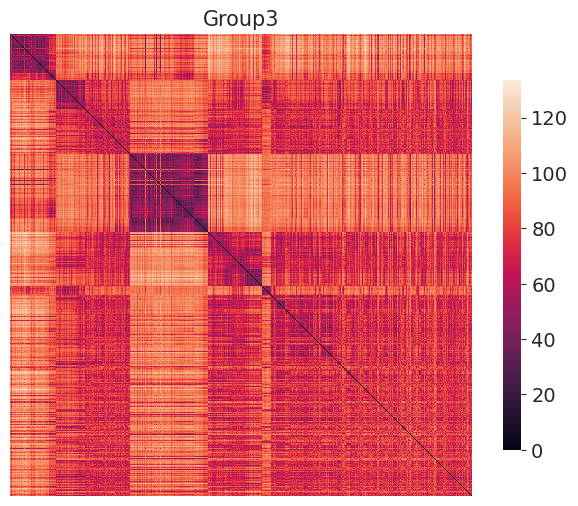

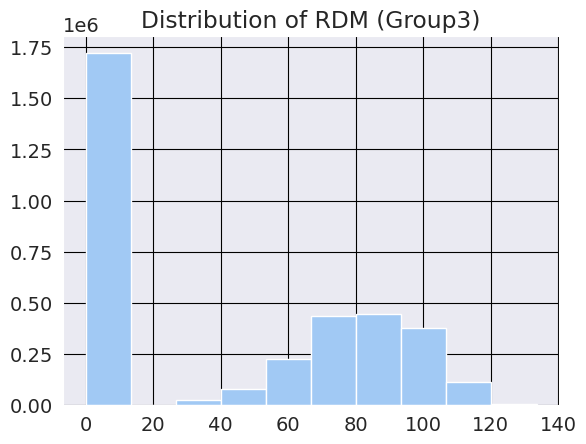

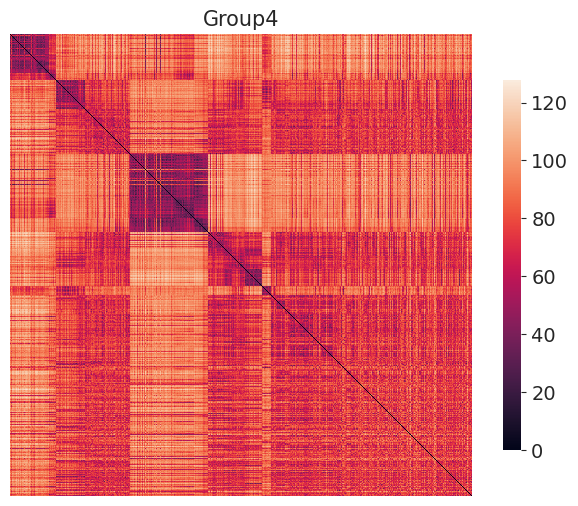

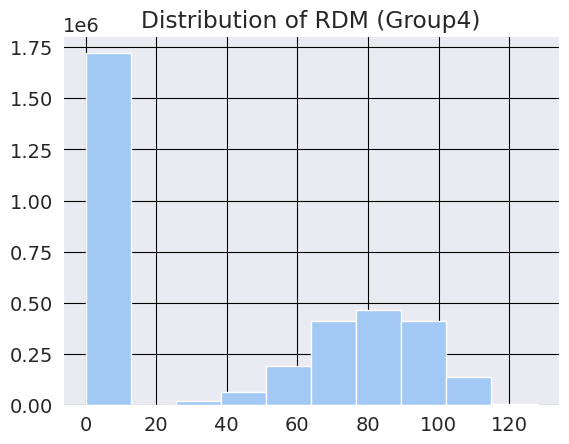

Correlation Group1 vs Group2 : 0.9716248509759134
Correlation Group1 vs Group3 : 0.9729106672988249
Correlation Group1 vs Group4 : 0.971293734817074
Correlation Group2 vs Group3 : 0.9727137456292158
Correlation Group2 vs Group4 : 0.97202160614847
Correlation Group3 vs Group4 : 0.9736576887900769


In [10]:
# Set the instance
align_representation = Align_Representations(representations_list = representations, config = config)

# RSA
sim_mat = align_representation.show_sim_mat(returned = "figure", sim_mat_format = "sorted", visualize_matrix = visualize_matrix)#fig_dir = "../figures")
align_representation.RSA_get_corr()

## Computing GW Alignment in the next block.

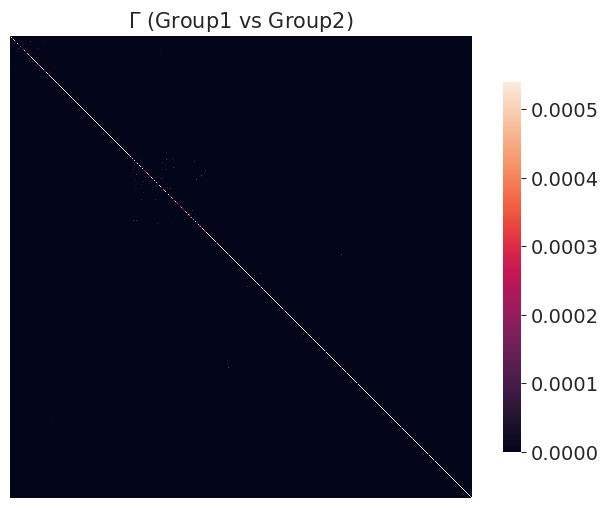

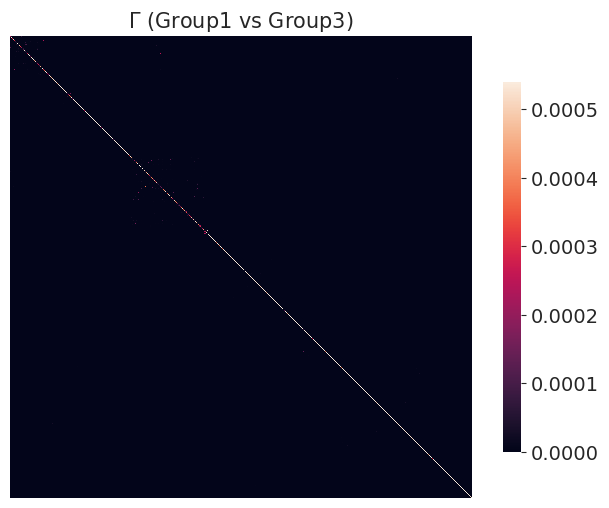

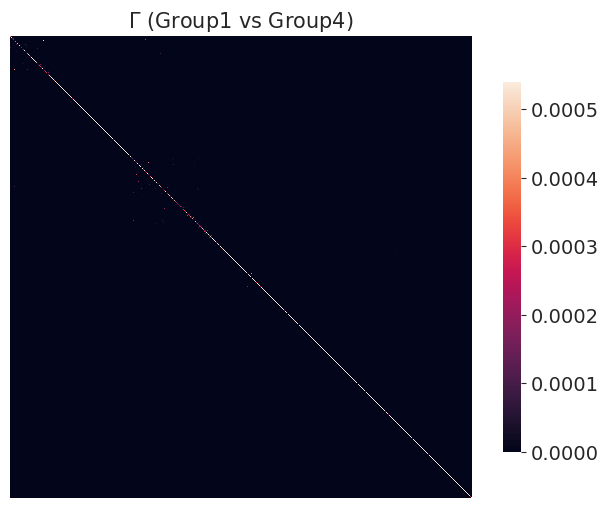

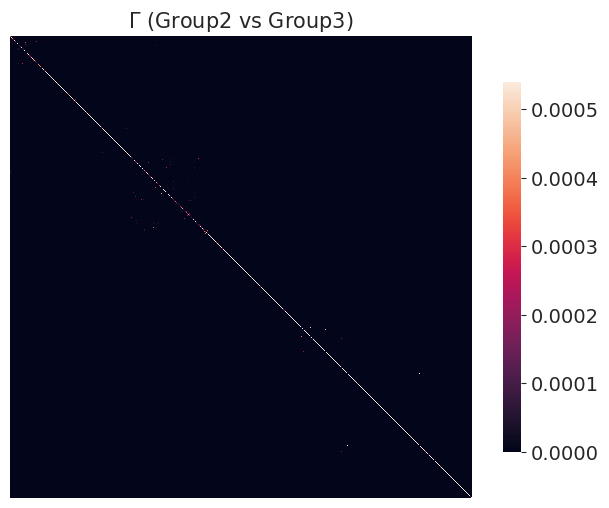

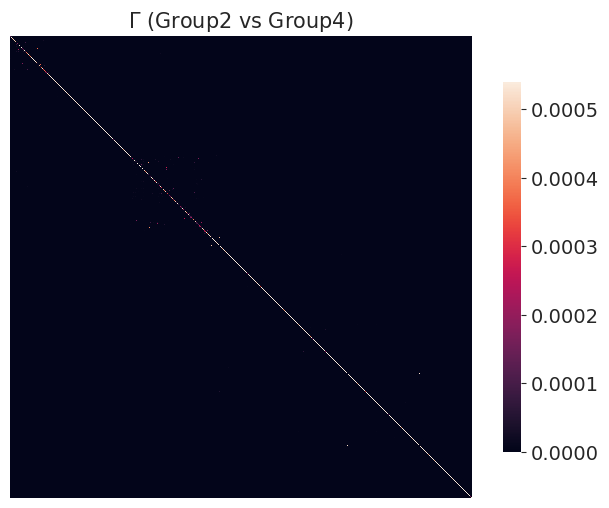

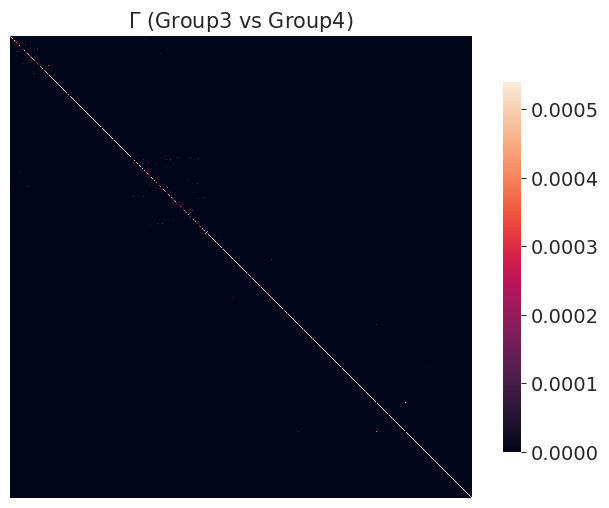

Top k accuracy : 
        Group1 vs Group2  Group1 vs Group3  Group1 vs Group4  Group2 vs Group3  \
top_n                                                                           
1             89.697950         88.187702         86.515642         88.295577   
5             96.979504         96.278317         96.548004         96.601942   
10            98.759439         98.381877         98.220065         98.274002   

       Group2 vs Group4  Group3 vs Group4  
top_n                                      
1             89.805825         87.486516  
5             96.440129         95.900755  
10            98.058252         98.220065  
Mean : 
 top_n
1     88.058252
5     96.353830
10    98.230852
dtype: float64


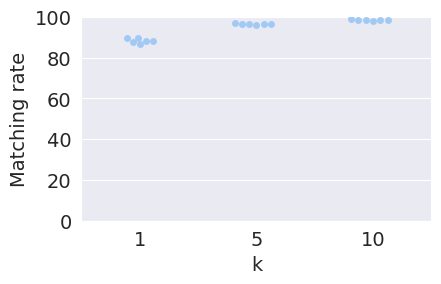

Group1 vs Group2 :  97.0873786407767
Group1 vs Group3 :  96.81769147788565
Group1 vs Group4 :  96.65587918015103
Group2 vs Group3 :  97.46494066882417
Group2 vs Group4 :  97.30312837108953
Group3 vs Group4 :  96.87162891046385


In [11]:
## If no need for computation, turn load_OT True, then OT plans calculated before is loaded.
align_representation.gw_alignment(load_OT = True, returned = "figure", OT_format = "sorted", visualize_matrix = visualize_matrix)

## Calculate the accuracy of the optimized OT matrix
align_representation.calc_accuracy(top_k_list = [1, 5, 10], eval_type = "ot_plan")
align_representation.plot_accuracy(eval_type = "ot_plan", scatter = True)

## Calclate the category level accuracy
align_representation.calc_category_level_accuracy()

## Align embeddings with OT plans and Visualize the aligned embeddings

K nearest matching rate : 
        Group1 vs Group2  Group1 vs Group3  Group1 vs Group4  Group2 vs Group3  \
top_n                                                                           
1             76.375405         77.669903         77.723840         78.317152   
5             93.365696         93.581446         94.012945         93.851133   
10            96.925566         96.494067         96.601942         96.871629   

       Group2 vs Group4  Group3 vs Group4  
top_n                                      
1             78.694714         75.350593  
5             93.905070         92.664509  
10            96.871629         96.116505  
Mean : 
 top_n
1     77.551241
5     93.603020
10    96.591154
dtype: float64


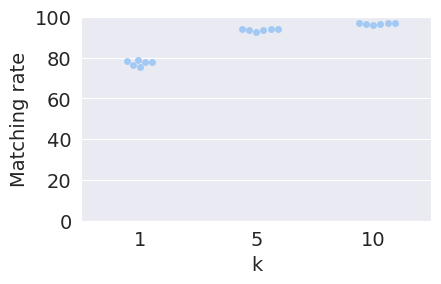

                    Number
animal                 114
bird                    25
insect                  17
plant                   28
clothing                82
clothing accessory      36
home decor              37
furniture               33
kitchen appliance        4
kitchen tool             7
container               97
food                   185
fruit                   33
vegetable               42
dessert                 36
drink                   19
electronic device       64
part of car             30
sports equipment        56
vehicle                 67
body part               34
medical equipment       24
musical instrument      33
office supply           19
tool                    93
toy                     32
weapon                  48
others                 559


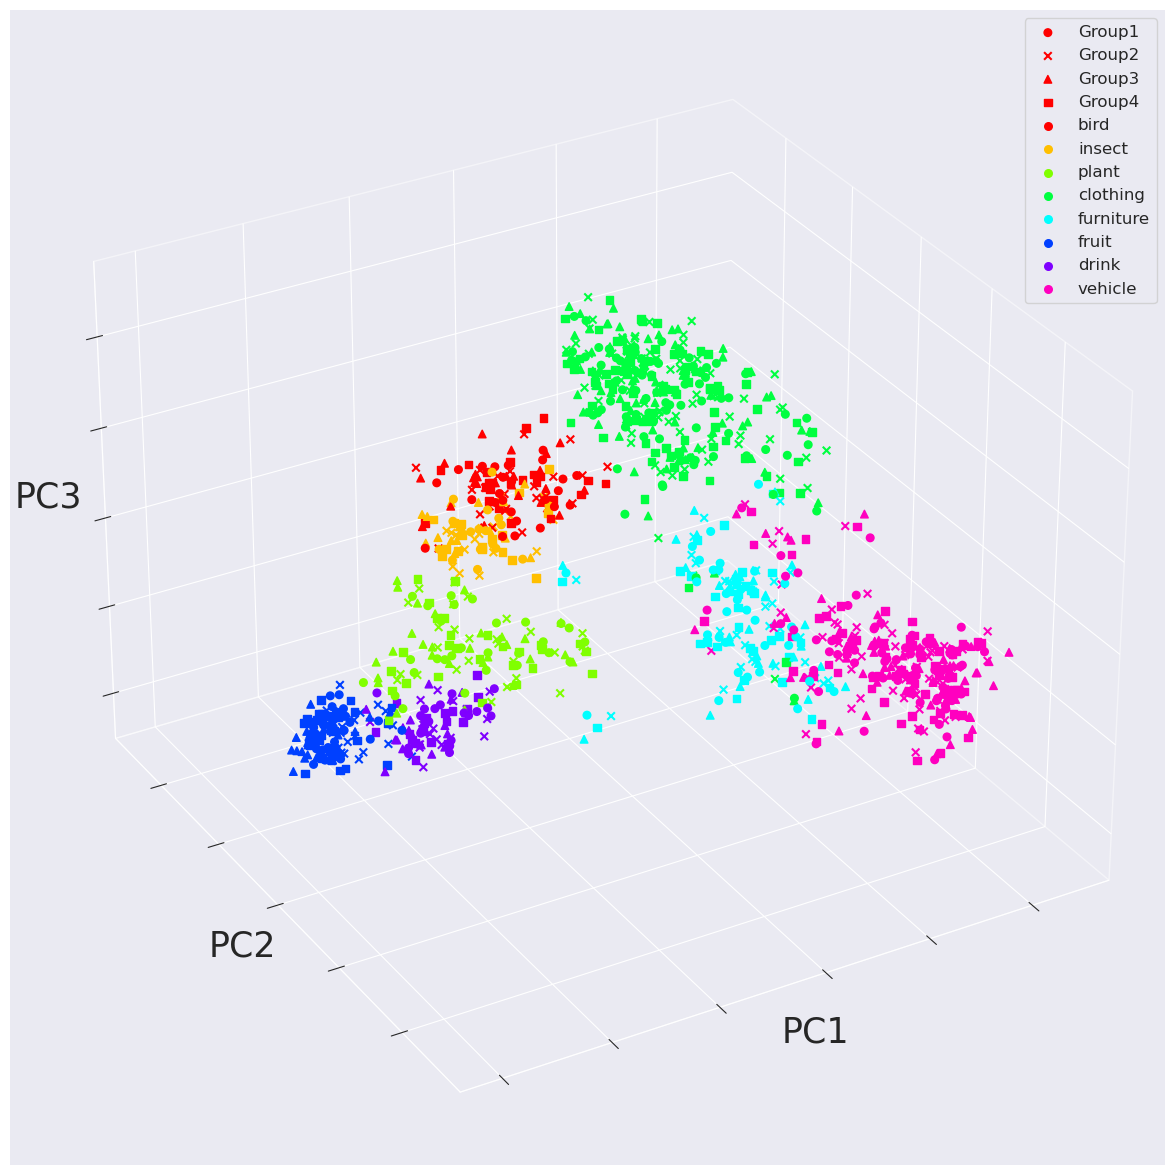

In [12]:

## Calculate the matching rate of k-nearest neighbors of embeddings
## Matching rate of k-nearest neighbors 
align_representation.calc_accuracy(top_k_list = [1, 5, 10], eval_type = "k_nearest")
align_representation.plot_accuracy(eval_type = "k_nearest", scatter = True)


# Set color labels and category data if exist.
if data_select == "THINGS":
    color_labels = None
    category_name_list = ["bird", "insect", "plant", "clothing",  "furniture", "fruit", "drink", "vehicle"]
    category_mat = pd.read_csv("../data/category_mat_manual_preprocessed.csv", sep = ",", index_col = 0)   
    category_idx_list, category_num_list = get_category_idx(category_mat, category_name_list, show_numbers = True)  
    align_representation.visualize_embedding(dim = 3, color_labels = color_labels, category_name_list = category_name_list, category_idx_list = category_idx_list, category_num_list = category_num_list)#, fig_dir = "../figures")
elif data_select == "color":
    file_path = "../data/color_dict.csv"
    data_color = pd.read_csv(file_path)
    color_labels = data_color.columns.values
    align_representation.visualize_embedding(dim = 3, color_labels = color_labels)#, fig_dir = "../figures")